In [1]:
import copy
import numpy as np
from Trip import Trip
from Point import Point
from Trips import Trips
import math
import matplotlib.pyplot as plt
import gurobipy as gb
from Simulation import Simulation
from Solver import Solver


In [2]:
n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(0)

In [3]:
J,D=Simulation.initialize_map(n)

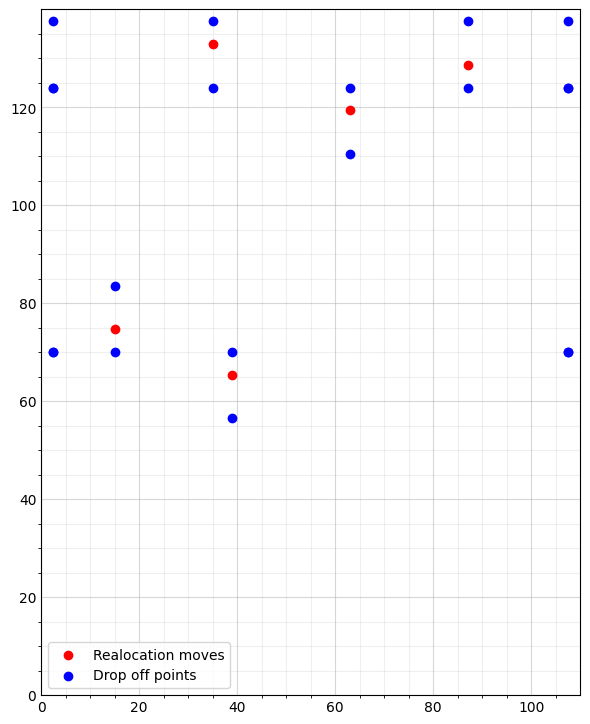

In [4]:
Simulation.plot_map(J,D,[],figsize=(5.5,7))

In [5]:
trips_problem=Solver.trptr_problem(n,m,J,D,Point(0,0),Point(0,0))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-29
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2827 rows, 312 columns and 12122 nonzeros
Model fingerprint: 0x86a6760b
Variable types: 42 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 115.3333785
Presolve removed 12 rows and 12 columns
Presolve time: 0.02s
Presolved: 2815 rows, 300 columns, 11762 nonzeros
Variable types: 42 continuous, 258 integer (258 binary)

Root relaxation: objective 0.000000e+00, 94 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0  

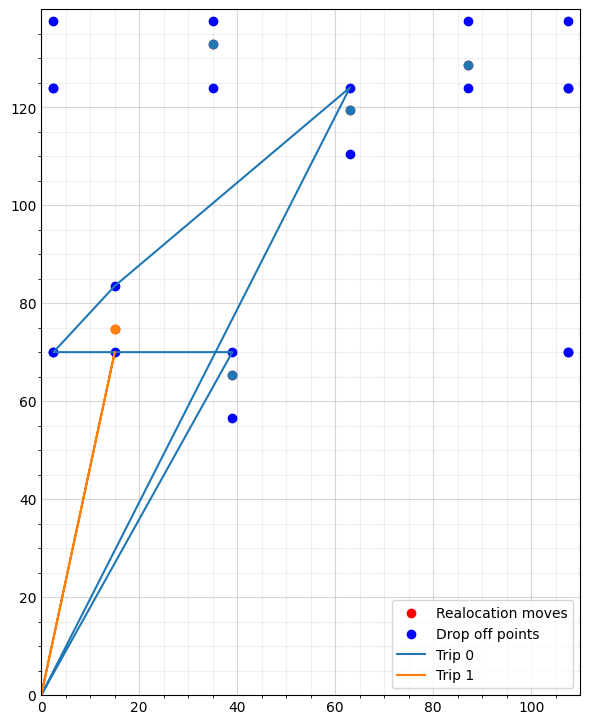

In [6]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

In [7]:
trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))

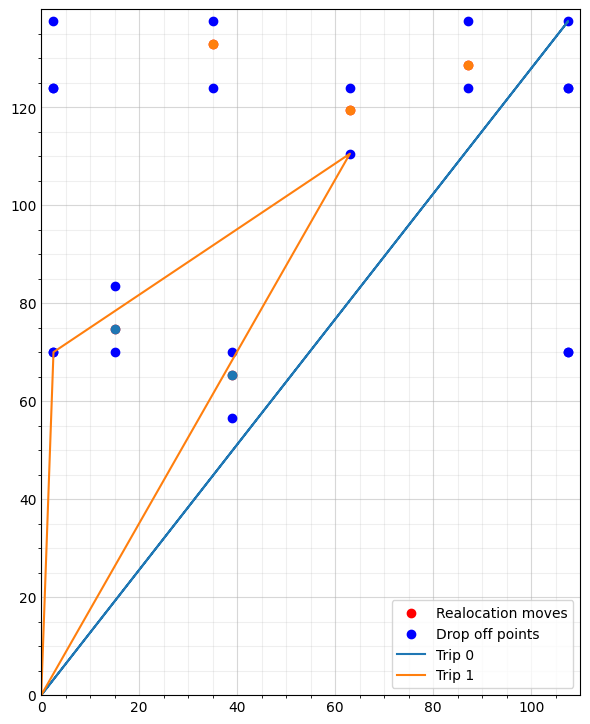

In [8]:
Simulation.plot_map(J,D,trips,figsize=(5.5,7))

In [9]:
new_trips=Solver.sm_matheuristic(J,D,trips)


Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x550302ab
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 163.9909769
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 163.991 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.639909769189e+02, best bound 1.639909769189e+02, gap 0.0000%


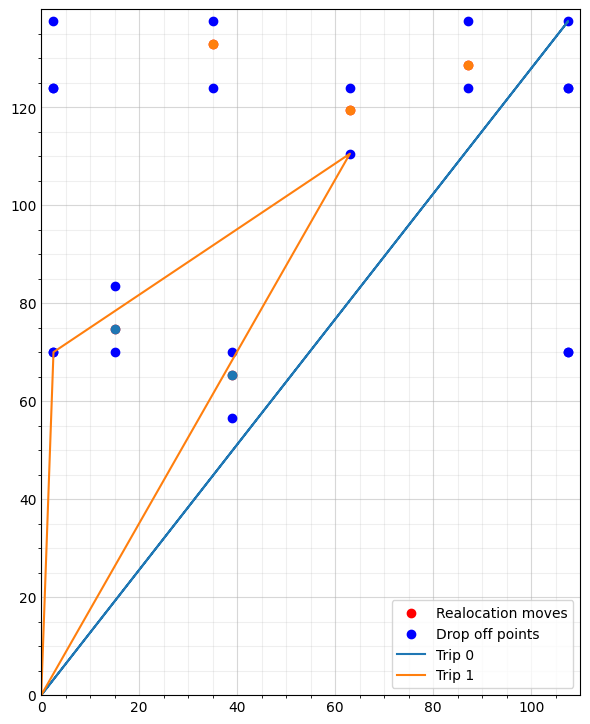

In [10]:
Simulation.plot_map(J,D,new_trips,figsize=(5.5,7))


In [11]:
trips_localsearch=Solver.local_search(new_trips,J,D,100000)

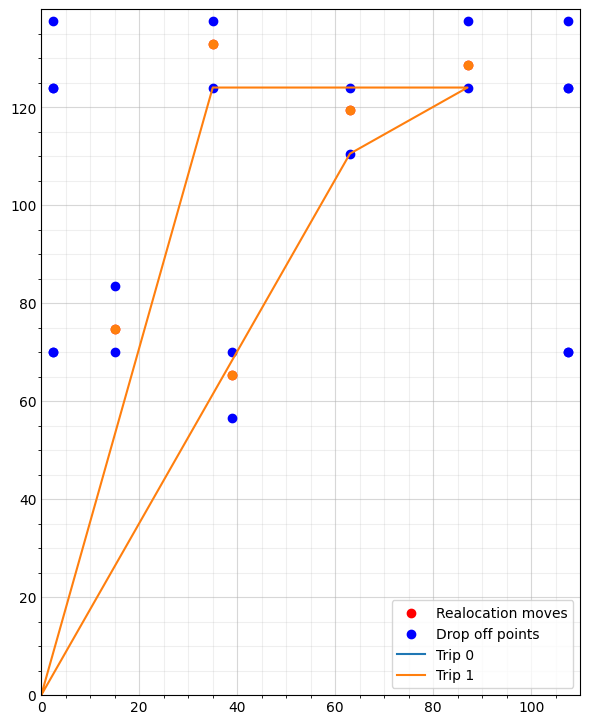

In [12]:
Simulation.plot_map(J,D,trips_localsearch,figsize=(5.5,7))


In [13]:
time_cc=Trips.get_total_duration(trips)
time_sam=Trips.get_total_duration(new_trips)
time_local_search=Trips.get_total_duration(trips_localsearch)
time_problem=Trips.get_total_duration(trips_problem)
print(f"time cc = {time_cc}")
print(f"time sam = {time_sam}")
print(f"time localsearch = {time_local_search}")
print(f'time problem={time_problem}')


time cc = 163.99097691888218
time sam = 163.99097691888218
time localsearch = 82.53072541966426
time problem=117.11953890676851


In [15]:
print(trips_localsearch[0])


J: (51,38.375) pi: (0,0) (51,29.5) (0,0) k=1
